# Project 2: Topic Classification

## *******PLEASE RUN IN PYTHON 3 KERNEL********

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test//2:], newsgroups_test.target[num_test//2:]
dev_data, dev_labels = newsgroups_test.data[:num_test//2], newsgroups_test.target[:num_test//2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)


training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


**(1).** For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(num_examples):
        print("Label:", train_labels[i])
        print("Label Name:", newsgroups_train.target_names[train_labels[i]])
        print("Message:", train_data[i])
        print("\n\n")

### STUDENT END ###
P1(5)    

Label: 1
Label Name: comp.graphics
Message: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych



Label: 3
Label Name: talk.religion.misc
Message: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating s

**(2)** Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [4]:
def P2():
### STUDENT START ###
    
    #part (a)
    vectorizer_a = CountVectorizer()
    features_vectors_a = vectorizer_a.fit_transform(train_data)
    print("Part A:")
    #size of vocabulary is length of each row, since features_vectors shows 
    #1 if vocabulary exists in row message, 0 otherwise
    print("Size of Vocabulary:", features_vectors_a.shape[1])
    #Average number of non-zero feaures calculated by getting sum of non-zero values per row
    #Then dividing by all the rows.  
    print("Average Number of non-zero features per sample:", features_vectors_a.getnnz(1).sum()/features_vectors_a.shape[0])
    #Fraction of non-zero entries is nnz count/total matrix size
    print("Fraction of non-zero entries:", features_vectors_a.nnz/(features_vectors_a.shape[0]*features_vectors_a.shape[1]))

    #part (b)
    print("\n\nPart B:")
    features = vectorizer_a.get_feature_names()
    print("0th Feature:", features[0])
    print("Last Feature: ", features[len(features)-1])
    
    #part (c)
    print("\n\nPart C:")
    #define new CountVectorizer function with vocabulary limited to 4 words
    vectorizer_c = CountVectorizer(vocabulary = ["atheism", "graphics", "space", "religion"])
    features_vectors_c = vectorizer_c.fit_transform(train_data)
    #confirming that the train vectors are appropriately shaped with length of 4 per row, which is the max vocabulary size
    print("Size of Features Matrix", features_vectors_c.shape)
    #Average number of non-zero feaures calculated by getting sum of non-zero values per row
    #Then dividing by all the rows.  
    print("Average Number of non-zero features per sample:", features_vectors_c.getnnz(1).sum()/features_vectors_c.shape[0])

    #part (d)
    print("\n\nPart D:")
    #define new CountVectorizer function to build bigram and trigram character features:
    vectorizer_d = CountVectorizer(ngram_range=(2,3), analyzer = 'char')
    features_vectors_d = vectorizer_d.fit_transform(train_data)
    #getting vocabulary size:
    print("Bigram and Trigram Characters Vocabulary Size:", features_vectors_d.shape[1])
    
    #part (e)
    print("\n\nPart E:")
    #define new CountVectorizer function where words that appear in fewer than 10 documents are excluded
    vectorizer_e = CountVectorizer(min_df = 10)
    features_vectors_e = vectorizer_e.fit_transform(train_data)
    #getting vocabulary size:
    print("Vocabulary Size of words appearing in more than 10 documents:", features_vectors_e.shape[1])
    
    
    #part (f)
    print("\n\nPart F:")
    #combine dev_data and train_data for CountVectorizer application
    combined_data = np.concatenate((train_data, dev_data), axis = 0)
    #apply the CountVectorizer function from part(a) on the combined set
    features_vectors_f = vectorizer_a.fit_transform(combined_data)
    #number of words in dev_data missing from the vocabulary
    #is the number of words in the vocabulary of the combined data - number of words in the train data vocabulary
    num_words_missing = features_vectors_f.shape[1] - features_vectors_a.shape[1]
    #print fraction
    print("Fraction of words in Dev Data missing from Vocabulary:", num_words_missing/features_vectors_a.shape[1])
    
    
### STUDENT END ###
P2()

Part A:
Size of Vocabulary: 26879
Average Number of non-zero features per sample: 96.70599803343165
Fraction of non-zero entries: 0.0035978272269590263


Part B:
0th Feature: 00
Last Feature:  zyxel


Part C:
Size of Features Matrix (2034, 4)
Average Number of non-zero features per sample: 0.26843657817109146


Part D:
Bigram and Trigram Characters Vocabulary Size: 35478


Part E:
Vocabulary Size of words appearing in more than 10 documents: 3064


Part F:
Fraction of words in Dev Data missing from Vocabulary: 0.14981956173964806


**ANSWER:**

a. The vocabulary size is the number of columns in the features vectors matrix, or the number of distinct words in the training data.  The size of the vocabulary is 26879. 

The average number of non-zero features is calculated by taking the count of non-zero features per example, then dividing by the total number of examples.  There are approximately 96.706 non-zero features per example.  

The fraction of non-zero features in the entire features vectors matrix is 0.0036, or 0.36%. 

b. the 0th feature is "00" while the last feature in alphabetical order is 'zyxel'

c. The training vectors are appropriate if their length is that of the vocabulary size.  In this case, our vocabulary size is 4, so we would expect4 all features vector lengths to be 4.  Given that the features matrix has 4 columns, the vectors are indeed appropriately sized.  The average number of non-zero features per example here is 0.2684

d. When we extract ONLY bigram and trigram characters as features, the vocabulary size is 35478

e. If we prune the words that appear in less than 10 documents, the vocabulary size is 3064. 

f. 15\% of words in the dev data are missing from the vocabulary constructed by the training data.  

**(3)** Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [5]:
def P3():
### STUDENT START ###
    
    #applying CountVectorizer on the train_data create features vectors:
    vectorizer = CountVectorizer()
    features_vectors = vectorizer.fit_transform(train_data)
    
    #finding optimal k for k nearest neighbors model
    knn = Pipeline([('classifier', KNeighborsClassifier())])
    k_values = {'classifier__n_neighbors': [1, 10, 20, 30, 40, 50]}
    gsknn = GridSearchCV(knn, param_grid = k_values, iid = True, refit = True, cv=5, return_train_score=True)
    gsknn.fit(features_vectors, train_labels)
    knn_results = gsknn
    print("Best k value for KNN:", knn_results.best_params_)
    
    #finding optimal alpha for Multimnomial Naive Bayes model:
    mnb = Pipeline([('classifier', MultinomialNB())])
    alphas = {'classifier__alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]}
    gsmnb = GridSearchCV(mnb, param_grid = alphas, iid = True, refit = True, cv=5, return_train_score=True)
    gsmnb.fit(features_vectors, train_labels)
    mnb_results = gsmnb
    print("Best alpha for MultinomialNB:", mnb_results.best_params_)
    
    #finding optimal C for Logistic Regression model:
    logr = Pipeline([('classifier', LogisticRegression(penalty='l2'))])
    C_values = {'classifier__C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10]}
    gslogr = GridSearchCV(logr, param_grid = C_values, iid = True, refit = True, cv=5, return_train_score=True)
    gslogr.fit(features_vectors, train_labels)
    logr_results = gslogr
    print("Best alpha for Logistic Regression:", logr_results.best_params_)

### STUDENT END ###
P3()

Best k value for KNN: {'classifier__n_neighbors': 20}


/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alp

Best alpha for MultinomialNB: {'classifier__alpha': 0.01}


/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best alpha for Logistic Regression: {'classifier__C': 0.5}


In [6]:
### STUDENT START ###

#F1 Scores Calculation:

#applying CountVectorizer on the train_data create features vectors:
vectorizer = CountVectorizer()
features_vectors_train = vectorizer.fit_transform(train_data)
features_vectors_dev = vectorizer.transform(dev_data)


#defining KNN model using the best value of k found above:
#calculate F1 score for KNN model using optimal k:
optimal_knn = KNeighborsClassifier(n_neighbors=20)
optimal_knn.fit(features_vectors_train, train_labels)
knn_pred = optimal_knn.predict(features_vectors_dev)
print("F1 scores for KNN Model with k=20:", metrics.f1_score(dev_labels, knn_pred, average = None))

#defining MultinomialNB model using the best value of alpha found above:
#calculate F1 score for MultinomialNB model using optimal alpha:
optimal_mnb = MultinomialNB(alpha=0.01)
optimal_mnb.fit(features_vectors_train, train_labels)
mnb_pred = optimal_mnb.predict(features_vectors_dev)
print("F1 scores for MultinomialNB Model with alpha = 0.01:", metrics.f1_score(dev_labels, mnb_pred, average = None))

#defining Logistic Regression model using the best value of C found above:
#calculate F1 score for Logistic Regression model using optimal C:
optimal_logr = LogisticRegression(C=0.5)
optimal_logr.fit(features_vectors_train, train_labels)
logr_pred = optimal_logr.predict(features_vectors_dev)
print("F1 scores for Logistic Regression Model with C = 0.5:", metrics.f1_score(dev_labels, logr_pred, average = None))

#accuracy score calculation for comparison with number with number 5
accuracy = np.sum(logr_pred == dev_labels)/dev_labels.size
print("Accuracy of Logistic Regression Model:", accuracy)

### STUDENT END ###

F1 scores for KNN Model with k=20: [0.41469816 0.46933333 0.49189189 0.26548673]
F1 scores for MultinomialNB Model with alpha = 0.01: [0.69005848 0.91256831 0.849642   0.56888889]


/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


F1 scores for Logistic Regression Model with C = 0.5: [0.58785942 0.8372093  0.78554217 0.56540084]
Accuracy of Logistic Regression Model: 0.7159763313609467


In [7]:
### STUDENT START ###
import pandas as pd

#Calculate the square weight values for each class, for each value of C:

#collect c_values used for optimization:
c_values = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10]

calculations = {}
for c in c_values:
    logr = LogisticRegression(C=c)
    logr.fit(features_vectors_train, train_labels)
    sum_squared_weights = []
    for l in range(logr.coef_.shape[0]):
        weights_squared = logr.coef_[l]*logr.coef_[l]
        sum_squared_weights.append(weights_squared.sum())
    key = "C="+str(c)
    calculations.update({key:sum_squared_weights})

calcs = pd.DataFrame.from_dict(calculations).T
calcs

### STUDENT END ###

/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,0,1,2,3
C=0.0001,0.007702,0.011941,0.009435,0.009103
C=0.001,0.165093,0.200953,0.180671,0.187243
C=0.01,2.541478,2.939709,2.862469,2.250029
C=0.1,27.129497,24.659044,27.457742,23.026053
C=0.5,102.594301,83.119649,99.038073,89.007356
C=1.0,166.983906,130.909324,157.944897,145.736830
C=10,586.135435,448.143214,539.252184,530.944267


**ANSWER:**

a. Nearest neighbors model relies on calculating the distance between each dev data and a set of n neighbors from the train data. The distance calculations depend on the features vectors of the training set and the dev set. The features vectors in this case are very long, since there are 26879 features or distinct words. As a result, nearest neighbors may still be relatively far distance wise, since the features vectors are too distinct from each other, which leads to poor accuracy of the predicted labels.

b. Naive Bayes assumes conditional independence of the features while logistic regression does not. In the Naive Bayes model, the vocabulary is treated as a bag of words where each word contributes to the label prediction probability independent from every other words. In the logistic regression model, words in the vocabulary are not conditionally indpendent, so label prediction probabilities depend on the joint frequency of multiple words. This lack of conditional independence leads to greater variance in the predictions of the logistic regression model, which in tern results in lower accuracies and precisions as reflected in the F1 scores.

c. L2 regularization attempts to minimize the sum of squared weights. The C parameter signifies the inverse of the regularization strength. So as C increases, the regularization strength decreases and the sum of squared weights increases. As expected, we see in the output table above that sum of squared weights increases as C increase, or as regularization strength decreases.

**(4)** Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [8]:
def P4():
### STUDENT START ###
    
    #use CountVectorizer() to define features vectors:
    vectorizer = CountVectorizer()
    features_vectors = vectorizer.fit_transform(train_data)
    features = np.array(vectorizer.get_feature_names())
    
    #define logarithmic regression model with optimal value of C=0.5
    logr = LogisticRegression(C = 0.5, multi_class = 'auto')
    logr.fit(features_vectors, train_labels)
    
    frames = []
    col_names = newsgroups_train.target_names
    for i in range(logr.coef_.shape[0]):
        #build table using dictionary, feature is the key
        table_dict = {}
        
        #for each class, pull the 5 features corresponding to the largest positive weights
        top5_features = features[np.argsort(logr.coef_[i])[-5:]]
        
        for f in top5_features:
            #for every feature in the top 5
            #pull all 4 coefficient values corresponding to each class and add value to coef_list
            index = np.argwhere(features == f)[0][0]
            coef_list = [logr.coef_[j][index] for j in range(4)]
            table_dict.update({f: coef_list})
    
        #create a data fram for each set of 5
        frame = pd.DataFrame.from_dict(table_dict).T
        frame.columns = col_names
        frame = frame.sort_values(by=[col_names[i]], ascending = False)
        frames.append(frame)
    
    full_df = pd.concat(frames)
    return full_df

### STUDENT END ###

df = P4()
df

/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,alt.atheism,comp.graphics,sci.space,talk.religion.misc
atheists,0.833768,-0.093275,-0.267485,-0.637641
bobby,0.823506,-0.191203,-0.286428,-0.387213
religion,0.798448,-0.508669,-0.658864,-0.050622
atheism,0.794564,-0.348535,-0.367224,-0.377050
deletion,0.724231,-0.249529,-0.272483,-0.270472
graphics,-0.640828,1.626449,-1.103015,-0.626312
image,-0.469386,1.116823,-0.672285,-0.381285
file,-0.275279,1.058950,-0.682659,-0.506144
3d,-0.303503,0.941460,-0.571106,-0.317598
computer,0.071194,0.843823,-0.569510,-0.396111


In [9]:
def P4_bigram():
### STUDENT START ###
    
    #use CountVectorizer() to define features vectors:
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    features_vectors = vectorizer.fit_transform(train_data)
    features = np.array(vectorizer.get_feature_names())
    
    #define logarithmic regression model with optimal value of C=0.5
    logr = LogisticRegression(C = 0.5, multi_class = 'auto')
    logr.fit(features_vectors, train_labels)
    
    frames = []
    col_names = newsgroups_train.target_names
    for i in range(logr.coef_.shape[0]):
        #build table using dictionary, feature is the key
        table_dict = {}
        
        #for each class, pull the 5 features corresponding to the largest positive weights
        top5_features = features[np.argsort(logr.coef_[i])[-5:]]
        
        for f in top5_features:
            #for every feature in the top 5
            #pull all 4 coefficient values corresponding to each class and add value to coef_list
            index = np.argwhere(features == f)[0][0]
            coef_list = [logr.coef_[j][index] for j in range(4)]
            table_dict.update({f: coef_list})
    
        #create a data fram for each set of 5
        frame = pd.DataFrame.from_dict(table_dict).T
        frame.columns = col_names
        frame = frame.sort_values(by=[col_names[i]], ascending = False)
        frames.append(frame)
    
    full_df = pd.concat(frames)
    return full_df

### STUDENT END ###


df_bigram = P4_bigram()
df_bigram

/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,alt.atheism,comp.graphics,sci.space,talk.religion.misc
claim that,0.605549,-0.199042,-0.274383,-0.140369
cheers kent,0.555719,-0.697903,-0.663776,0.534812
was just,0.482050,-0.131419,-0.128862,-0.227465
you are,0.472741,-0.279913,-0.481426,0.028367
are you,0.446954,-0.248257,-0.097166,-0.305622
looking for,-0.630341,1.108366,-0.499926,-0.571863
in advance,-0.459351,0.832568,-0.438488,-0.418455
comp graphics,-0.292166,0.801202,-0.370919,-0.285185
out there,-0.274802,0.758683,-0.479004,-0.277087
is there,-0.340882,0.754978,-0.468250,-0.257080


**ANSWER:**

For features with the largest weights, I chose the features with the greatest positive value of weights. I took positive values of the coef_ to correspond to words that are positively selected for the class, meaning that these words appear a lot for documents of that class. Negative values of coef_ then correspond to words that tend not to occur for a particular class. In the tables I created above, 5 features are selected for each class with the highest postive weights, the all weights for each each feature for each class is displayed. The features are grouped by the class for which they have the greatest weight.

In the unigram table, the top 5 words for the comp.graphics class (computer, file, 3d, image, graphics) and the top 5 words for the sci.space class (space, orbit, nasa, launch, spacecraft) are not surprising and quite expected. The word deletion and bobby are surprising features for the alt.atheism class, as it is hard to know why these words appear so often, without context from the documents themselves. Also surprsing are the words blood and fbi for the talk.religion.misc class.

For the bigram features, the most surprising one is "cheers kent" being in the top 5 for both alt.atheism and talk.religion.misc classes. These words do not appear to be frequent in coloquial language, so would be worth investigating why the pair appears so often, perhaps in other context such as someone's signature. Again, the "the fbi" being a freqent feature for talk.religion.misc is also interesting because it is unexpected that the fbi would appear so freqently in documents about religion.

**(5)** Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [10]:
import re

def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    
    #change all letters to lowercase
    s = s.lower()
    
    #removing all strings of only numbers
    s = re.sub(r"\b\d+\b", '', s)
    
    #replacing all special characters with the token
    special_char = re.compile('\W')
    s = special_char.sub(' ', s)

    #shortening words by removing "ing"
    shortening_char_1= re.compile('ing'+'\s')
    s = shortening_char_1.sub(' ', s)
    
    #shortening words by removing "s"
    shortening_char_2= re.compile('s'+'\s')
    s = shortening_char_2.sub(' ', s)
    
    #removing underscore
    underscore = re.compile('_')
    s = underscore.sub('', s)

    return s


def P5():
    
    #process train data and apply countvectorizer to get features vector
    processed_train = list(map(better_preprocessor, train_data))
    vectorizer = CountVectorizer(stop_words = "english")
    features_vectors_train = vectorizer.fit_transform(processed_train)
    #print size of dictionary:
    print("Size of Vocabulary:", features_vectors_train.shape[1])
    #print(vectorizer.get_feature_names())
    
    #process dev data and apply countervectorizor transform to get features vector
    processed_dev = list(map(better_preprocessor, dev_data))
    features_vectors_dev = vectorizer.transform(processed_dev)
    
    #defining Logistic Regression model using the best value of C found in #3:
    #calculate F1 score for Logistic Regression model using optimal C:
    logr = LogisticRegression(C=0.5)
    logr.fit(features_vectors_train, train_labels)
    logr_pred = logr.predict(features_vectors_dev)
    print("F1 scores for Logistic Regression Model with C = 0.5:", metrics.f1_score(dev_labels, logr_pred, average = None))
    accuracy = np.sum(logr_pred == dev_labels)/dev_labels.size
    print("Accuracy:", accuracy)

### STUDENT END ###
P5()

Size of Vocabulary: 21395


/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


F1 scores for Logistic Regression Model with C = 0.5: [0.60897436 0.87830688 0.8        0.56540084]
Accuracy: 0.7366863905325444


**Answer**
With pre-processing, the vocabulary size changed by 5484 less features, going from 26879 for unprocess training data to 21395. The prediction accuracy increased from 71.6% to 73.7%

For the same value of C as number 3 (C= 0.5), the new F1 scores are [0.60897436,  0.87830688,  0.8, 0.56540084] for the 4 classes.  Comparing this to the F1 scores from #3, which are [0.58785942, 0.8372093,  0.78554217, 0.56540084], we see that F1 scores have increased for 3 classes - alt.atheism, comp.graphics, sci.space and remains almost entirely unchanged for the 4th class, talk.religion.misc.  In my pre-processing function, I removed all special characters and only numerical strings.  Furthermore, I shortened words by removing ending "ing" or ending "s".  This may have had minimal to no effect on the talk.religion.misc which may not have had many documents that had special characters or words with the endings I removed.  

**(6)** The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

**ANSWER:** From the output below, we see that for L1 regularization, the number of non-zero weights from the coef_ matrix is a lot less, 1173, compared to the number of 107516 for non-zero weights for L2

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

In [11]:
def P6():

    ### STUDENT START ###
    
    #COMPARISON of L1 and L2 penalties
    vectorizer = CountVectorizer()
    features_vectors_train = vectorizer.fit_transform(train_data)
    
    #train logistic regression model on train data feature vectors with penalty = l1
    #use optimized C = 0.5
    logr_l1 = LogisticRegression(C=0.5, penalty = 'l1')
    logr_l1.fit(features_vectors_train, train_labels)
    logr_l1_coef = logr_l1.coef_
    #print all non-zero weights from L1 model
    print("Number of Non-Zero Weights for L1 Regularization Logistic Regression is:", np.count_nonzero(logr_l1_coef))
    
    ##train logistic regression model on train data feature vectors with penalty = l2 for non-zero weights comparison
    #use optimized C = 0.5
    logr_l2 = LogisticRegression(C=0.5, penalty = 'l2')
    logr_l2.fit(features_vectors_train, train_labels)
    #print all non-zero weights from L2 model
    print("Number of Non-Zero Weights for L2 Regularization Logistic Regression is:", np.count_nonzero(logr_l2.coef_))
    
    ### STUDENT END ###
P6()

/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Number of Non-Zero Weights for L1 Regularization Logistic Regression is: 1173
Number of Non-Zero Weights for L2 Regularization Logistic Regression is: 107516


In [12]:
### STUDENT START ###


#RETRAIN L2 Logistic Regression Model using limited vocabulary, find accuracies of model
# Keep this random seed here to make comparison easier.
np.random.seed(0)

def L2_log_reg_vsize_acc(c):

    
    #initial feature vectors creation:
    vectorizer = CountVectorizer()
    features_vectors_train = vectorizer.fit_transform(train_data)
    
    #train logistic regression model on train data feature vectors with penalty = l1 for any value of c
    logr_l1 = LogisticRegression(C = c, penalty = 'l1', tol = 0.1)
    logr_l1.fit(features_vectors_train, train_labels)
    logr_l1_coef = logr_l1.coef_
    
    #Extract limited vocabulary based on L1 model non-zero weights
    full_vocabulary = vectorizer.get_feature_names()
    limited_vocabulary = []
    #limited vocabulary only keeps features that have non-zero weight for any class:
    for i in range(len(full_vocabulary)):
        if logr_l1_coef[0][i] != 0 or logr_l1_coef[1][i] != 0 or logr_l1_coef[2][i] != 0 or logr_l1_coef[3][i] != 0:
            limited_vocabulary.append(full_vocabulary[i])
    
    #create new features vector for L2 Logistic Regression training, using limited_vocabulary
    vectorizer2 = CountVectorizer(vocabulary = limited_vocabulary)
    features_vectors_train2 = vectorizer2.fit_transform(train_data)
    features_vectors_dev2 = vectorizer2.transform(dev_data)
    
    #train L2 regularization logistic regression model on new features vector
    logr_l2 = LogisticRegression(C = c, penalty = 'l2', tol = 0.1)
    logr_l2.fit(features_vectors_train2, train_labels)
    
    logr_l2_pred = logr_l2.predict(features_vectors_dev2)
    accuracy = np.sum(logr_l2_pred == dev_labels)/dev_labels.size
    return [len(limited_vocabulary), accuracy] 


c_values = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
results = list(map(L2_log_reg_vsize_acc, c_values))
lengths = [results[i][0] for i in range(len(c_values))]
accuracies = [results[j][1] for j in range(len(c_values))]

results_table = pd.DataFrame([c_values, lengths, accuracies]).T
results_table.columns = ["C-Values", "Vocabulary Lengths", "Accuracies"]
results_table

/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,C-Values,Vocabulary Lengths,Accuracies
0,0.01,21.0,0.477811
1,0.05,125.0,0.612426
2,0.10,236.0,0.636095
3,0.50,1328.0,0.643491
4,1.00,1783.0,0.665680
5,5.00,5206.0,0.678994
6,10.00,7308.0,0.674556
7,50.00,15122.0,0.665680
8,100.00,19991.0,0.647929
9,500.00,26279.0,0.692308


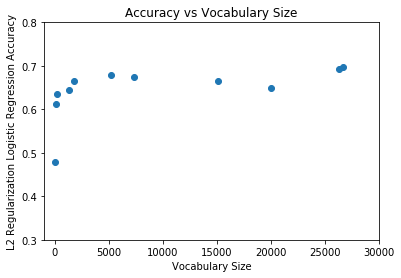

In [13]:
### STUDENT START ###

#plot accuracies of retrained model vs vocabulary size:
#show actual data points
vs = results_table['Vocabulary Lengths'].as_matrix()[:, np.newaxis]
acc = results_table['Accuracies'].as_matrix()[:, np.newaxis]

plt.scatter(vs, acc)
    
#other labels
plt.xlabel("Vocabulary Size")
plt.ylabel("L2 Regularization Logistic Regression Accuracy")
plt.xlim((-1000, 30000))
plt.ylim((0.30, 0.80))
plt.title("Accuracy vs Vocabulary Size")
plt.show()

### STUDENT END ###


**(7)** Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [14]:
def P7():
    ### STUDENT START ###
    
    #use TfidfVectorizer to create features vector
    vectorizer = TfidfVectorizer(smooth_idf=False)
    tfidf_train = vectorizer.fit_transform(train_data)
    
    #fit logistic regression model using features vector with C= 100
    logr = LogisticRegression(C = 100)
    logr.fit(tfidf_train, train_labels)

    #extract predicted labels and probabilities from dev_data predictions
    tfidf_dev = vectorizer.transform(dev_data)
    probabilities = logr.predict_proba(tfidf_dev)
    pred_labels = logr.predict(tfidf_dev)
    
    #get maximum predicted probability, which is the maximum probability of each feature for any label
    max_pred_prob = np.amax(probabilities, axis = 1)
    
    #get predicted probability of correct label
    predicted_prob_correct_label = np.zeros(dev_labels.shape[0])
    for i in range(dev_labels.shape[0]):
        predicted_prob_correct_label[i] = probabilities[i][dev_labels[i]]
    
    #calculate ratios for every dev data point
    R = max_pred_prob / predicted_prob_correct_label
    
    #printing documents with highest 3 R values
    top3R = R[np.argsort(R)[-3:]]
    dev_data_array = np.array(dev_data)
    top3dev_data = dev_data_array[np.argsort(R)[-3:]]
    top3dev_labels = dev_labels[np.argsort(R)[-3:]]
    top3pred_labels = pred_labels[[np.argsort(R)[-3:]]]

    for j in range(3):
        print("Ratio:", top3R[j])
        print("Predicted Label:", newsgroups_train.target_names[top3pred_labels[j]])
        print("Actual Label:", newsgroups_train.target_names[top3dev_labels[j]])
        print("Document:", top3dev_data[j])
        print("\n\n")
    ### STUDENT END ###
P7()

/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/diliwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Ratio: 257.7091834775314
Predicted Label: talk.religion.misc
Actual Label: alt.atheism
Document: 
The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...




Ratio: 321.5686970602032
Predicted Label: comp.graphics
Actual Label: talk.religion.misc
Document: Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.



Ratio: 873.5835125457162
Predicted Label: comp.graphics
Actual Label: talk.religion.misc
Document: I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a

/Users/diliwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


**ANSWER:**  The CountVectorizer gives every word in the same example equal weight, with a count of 1 if it appears and a count of 0 if it does not appear.  On the other hand, TfidfVectorizer weighs every word by the product of its term freqency and its inverse document-frequency (idf), where the idf for a word is a function of its freqency in the given document and the number of documents that contain the word.  The idf is inversely proportional to the number of documents, or other examples that contain the word. 

The dev data with values of R greater than 1 are wrongly predicted values.  The greater the value, the higher the max probability and/or the lower the predicted probability of the correct label.  For the dev data with top 3 R that I printed above, the first one of the 3 is too short, or as too few words, for the mistakes to be noticeable.  For the other 2 examples I printed, the mistake is that the content matches the dev label, but the document contains key words that match what one would expect to read for documents pertaining to predicted label, which is incorrect. For instance, for the second printed example, the document is "Can anyone provide me a ftp site where I can obtain a online version of the Book of Mormon. Please email the internet address if possible", where the incorretly predicted class of comp.graphics resulted from the key words "ftp site"

Since the key words are the ones causing mistakes, we can reduce the mistakes by extracting features that have more context, thereby giving the context of the document greater weight in label prediction, rather than the individual words.  One way we can consider creating more contextual features is by changing the ngram_range parameter when creating the features vectors.  If we increase n to allow for only multiple word features, we may be able to lower the influence of key single words that cause mistaken predictions. 